In [3]:
#import Libararies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

C:\Users\Rida\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


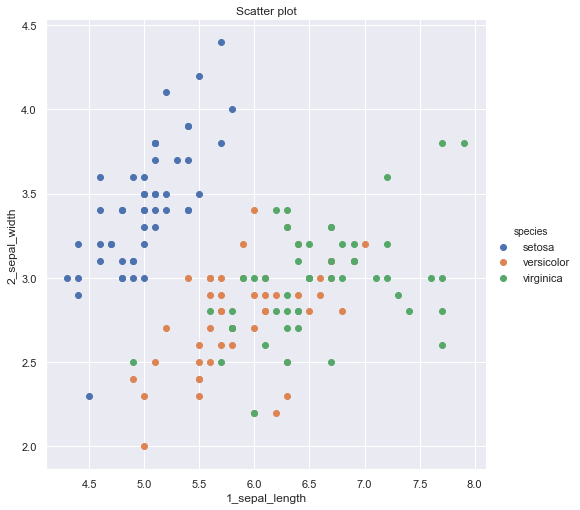

In [4]:
#load data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Ploting sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [9]:
#Numpy Implimentation
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):    
    #Return the class for which the function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class 
    scores_list = []    
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

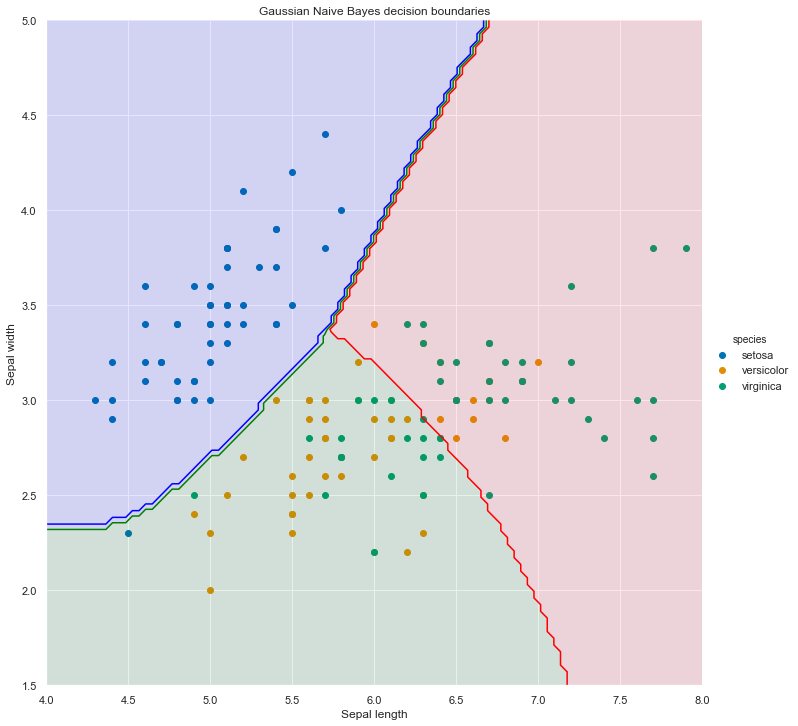

In [10]:
#Plotting decision boundries
#Estimating parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# The 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value 
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class 
Z = zz.reshape(X.shape)

#Ploting the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

C:\Users\Rida\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


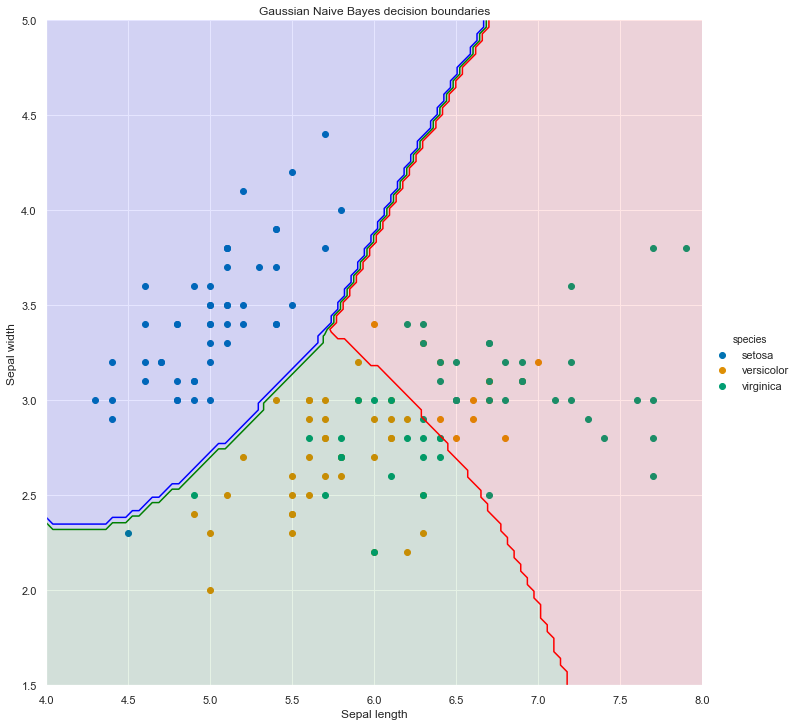

In [11]:
#Sklearn implementation of Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)


# 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value 
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class 
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

In [12]:
#Numpy accuracy
y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )
display(np.mean(y_pred == y_labels))

#Sklearn accuracy
display(model_sk.score(X_data,y_labels))

0.78

0.78

C:\Users\Rida\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'color'
C:\Users\Rida\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'color'


[(-8, 8), (-8, 8)]

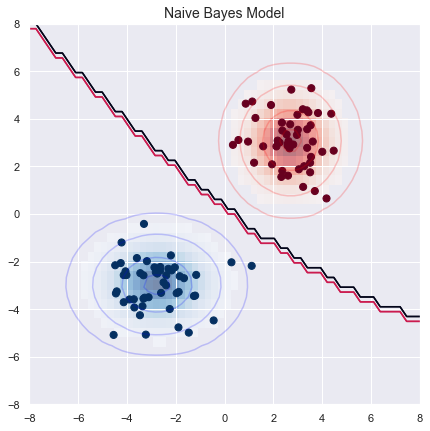

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=[[3,3],[-3,-3]], random_state=2, cluster_std=[1,1])

fig, ax = plt.subplots(figsize = (7,7))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-8, 8)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

#Fit model
model_sk_1 = GaussianNB(priors = None)
model_sk_1.fit(X,y)

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    Xgrid_Pred = model_sk_1.predict(Xgrid)
    ax.contour(xx, yy, Xgrid_Pred.reshape(xx.shape),1,color = 'red')
    
ax.set(xlim=xlim, ylim=ylim)